In [1]:
import torch
import cv2
import os
import matplotlib.pyplot as plt

torch experiment

In [2]:
a=torch.rand(2,3,3,2)
print(a)

tensor([[[[0.6647, 0.9977],
          [0.8834, 0.7424],
          [0.8463, 0.2711]],

         [[0.6010, 0.1283],
          [0.7915, 0.7497],
          [0.3930, 0.3716]],

         [[0.2594, 0.2121],
          [0.9227, 0.0131],
          [0.6713, 0.7108]]],


        [[[0.9108, 0.1890],
          [0.8841, 0.1076],
          [0.5223, 0.7023]],

         [[0.5224, 0.0114],
          [0.4131, 0.8586],
          [0.3008, 0.2550]],

         [[0.5032, 0.2206],
          [0.6302, 0.8669],
          [0.2856, 0.2851]]]])


getting value of matrix

In [3]:
a[0][1]

tensor(0.0213)

finding working directory

In [4]:
os.getcwd()

'/home/rahul/Desktop/python'

reading image

In [3]:
im=cv2.imread(r"dog.jpeg")
im.shape

(148, 256, 3)

plotting image

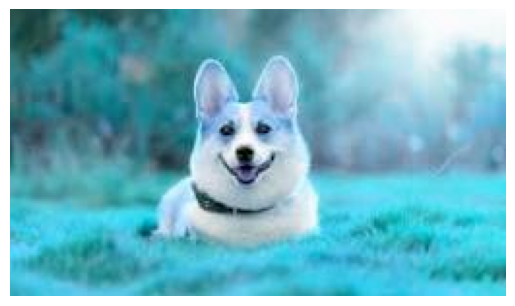

In [6]:
plt.imshow(im)
plt.axis("off")
plt.show()

converting image to tensor

In [4]:
ten=torch.tensor(im,dtype=torch.float32)

checking type

In [5]:
ten.dtype


torch.float32

differentiation

In [ ]:
x=torch.tensor(2.0,requires_grad=True)
y=x**2+x**3+x**5
y.backward()
print(x.grad)

tensor(96.)


neural_network_backbone

In [6]:
w=torch.tensor(2.0,requires_grad=True)
x=torch.tensor(1.0)
b=torch.tensor(1.0)

In [7]:
y=w*x+b
y_actual=torch.tensor(6.0)

In [33]:
loss=(y-y_actual)**2


now differentiate loss wrt weights

In [36]:
import torch

w = torch.tensor(2.0, requires_grad=True)
x = torch.tensor(1.0)
b = torch.tensor(1.0)

y = w * x + b
y_actual = torch.tensor(6.0)

loss = (y - y_actual) ** 2
loss.backward()

print(w.grad)


tensor(-6.)


In [8]:
w=torch.tensor(2.0,requires_grad=True)
x=torch.tensor(1.0)
b=torch.tensor(1.0)
y=w*x+b
y_actual=torch.tensor(6.0)
loss=(y-y_actual)**2
print(f"loss is {loss.item()}")
loss.backward()
print(f"the gradient is {w.grad})")

l=0.01
w_new=w-l*(-6.0)
print(f"The new weight is {w_new}")


loss_new=(w_new*x+b-y_actual)**2
print(f"New loss is {loss_new :1f}")




loss is 9.0
the gradient is -6.0)
The new weight is 2.059999942779541
New loss is 8.643600


/home/rahul/Desktop/python/venv/lib/python3.12/site-packages/torch/autograd/graph.py:841: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 12020). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at /pytorch/c10/cuda/CUDAFunctions.cpp:119.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


now with suitable code

In [ ]:
w=torch.tensor(2.0,requires_grad=True)
x=torch.tensor(1.0)
b=torch.tensor(1.0)
y=w*x+b
y_actual=torch.tensor(6.0)
loss=(y-y_actual)**2
print(f"loss is {loss.item()}")
loss.backward()

print(f"the gradient is {w.grad})")
with torch.no_grad():
    w-=0.01*w.grad
w.grad.zero_()
print(f"updated weights{w:2f}")


loss is 9.0
the gradient is -6.0)
updated weights2.060000


with optimizer

In [9]:
w=torch.tensor(1.0,requires_grad=True)
x=torch.tensor(1.0)
b=torch.tensor(1)
y_pred=torch.tensor(10)
optimizer=torch.optim.SGD([w],lr=0.01)

with loop

In [11]:
for epoch in range (10):
    y=w*x+b
    loss=(y-y_pred)**2
    loss.backward()

    optimizer.step()
    optimizer.zero_grad()
    print(f"epochs: {epoch},loss :{loss.item()},weights update: {w.item()} and output : {y}")    

epochs: 0,loss :42.72690963745117,weights update: 2.594149112701416 and output : 3.4634175300598145
epochs: 1,loss :41.03492736816406,weights update: 2.72226619720459 and output : 3.594149112701416
epochs: 2,loss :39.409942626953125,weights update: 2.84782075881958 and output : 3.72226619720459
epochs: 3,loss :37.849308013916016,weights update: 2.9708642959594727 and output : 3.84782075881958
epochs: 4,loss :36.35047912597656,weights update: 3.091447114944458 and output : 3.9708642959594727
epochs: 5,loss :34.9109992980957,weights update: 3.209618091583252 and output : 4.091446876525879
epochs: 6,loss :33.52852249145508,weights update: 3.325425624847412 and output : 4.209618091583252
epochs: 7,loss :32.2007942199707,weights update: 3.4389171600341797 and output : 4.325425624847412
epochs: 8,loss :30.925642013549805,weights update: 3.5501387119293213 and output : 4.43891716003418
epochs: 9,loss :29.700990676879883,weights update: 3.6591360569000244 and output : 4.550138473510742


change of optimizer

In [88]:
w=torch.tensor(1.0,requires_grad=True)
x=torch.tensor(1.0)
b=torch.tensor(1)
y_pred=torch.tensor(10)
optimizer=torch.optim.Adam([w],lr=0.01)

for epoch in range (10):
    y=w*x+b
    loss=(y-y_pred)**2
    loss.backward()

    optimizer.step()
    optimizer.zero_grad()
    print(f"epochs: {epoch}, loss :{loss.item()}, weights update: {w.item()}  and output : {y}")   

epochs: 0, loss :64.0, weights update: 1.0099999904632568  and output : 2.0
epochs: 1, loss :63.84009552001953, weights update: 1.019999623298645  and output : 2.009999990463257
epochs: 2, loss :63.6804084777832, weights update: 1.029998779296875  and output : 2.0199995040893555
epochs: 3, loss :63.52091979980469, weights update: 1.0399971008300781  and output : 2.029998779296875
epochs: 4, loss :63.36164474487305, weights update: 1.0499944686889648  and output : 2.039997100830078
epochs: 5, loss :63.20258712768555, weights update: 1.059990644454956  and output : 2.049994468688965
epochs: 6, loss :63.04374313354492, weights update: 1.0699853897094727  and output : 2.059990644454956
epochs: 7, loss :62.8851318359375, weights update: 1.079978585243225  and output : 2.0699853897094727
epochs: 8, loss :62.726741790771484, weights update: 1.0899698734283447  and output : 2.0799784660339355
epochs: 9, loss :62.568580627441406, weights update: 1.099959135055542  and output : 2.089969873428344